In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge 
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error

In [2]:
# load dataet's first 10 rows
hp_df = pd.read_csv('housing_price_dataset.csv')
hp_df.head(10)

SquareFeet  Bedrooms  Bathrooms Neighborhood  YearBuilt          Price
0        2126         4          1        Rural       1969  215355.283618
1        2459         3          2        Rural       1980  195014.221626
2        1860         2          1       Suburb       1970  306891.012076
3        2294         2          1        Urban       1996  206786.787153
4        2130         5          2       Suburb       2001  272436.239065
5        2095         2          3       Suburb       2020  198208.803907
6        2724         2          1       Suburb       1993  343429.319110
7        2044         4          3        Rural       1957  184992.321268
8        2638         4          3        Urban       1959  377998.588152
9        1121         5          2        Urban       2004   95961.926014

In [3]:
# information about data
hp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


From the above information, we do not have any null entry in the data.

In [4]:
hp_df.shape

(50000, 6)

The dataset has 50000 instances and 6 features

In [5]:
# check for null values to be sure 
hp_df.isna().sum()

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

In [6]:
# description
hp_df.describe(exclude=[object]).T

count           mean           std           min            25%  \
SquareFeet  50000.0    2006.374680    575.513241   1000.000000    1513.000000   
Bedrooms    50000.0       3.498700      1.116326      2.000000       3.000000   
Bathrooms   50000.0       1.995420      0.815851      1.000000       1.000000   
YearBuilt   50000.0    1985.404420     20.719377   1950.000000    1967.000000   
Price       50000.0  224827.325151  76141.842966 -36588.165397  169955.860225   

                      50%            75%            max  
SquareFeet    2007.000000    2506.000000    2999.000000  
Bedrooms         3.000000       4.000000       5.000000  
Bathrooms        2.000000       3.000000       3.000000  
YearBuilt     1985.000000    2003.000000    2021.000000  
Price       225052.141166  279373.630052  492195.259972

# EXPLORATORY DATA ANALYSIS

In [7]:
hp_df['Price'].min()

-36588.16539749279

From the above statistics, the average house price is $492195.26. The minimum price shows a negative value which is odd, Price should always be positive. I would take the absolute of  negative entries to make it a valid price in this context.

In [8]:
#  take absolute value of 'Price' column
hp_df['Price'] = hp_df['Price'].abs()

C:\Users\DAVID\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Distribution of house prices')

<Figure size 900x900 with 0 Axes>

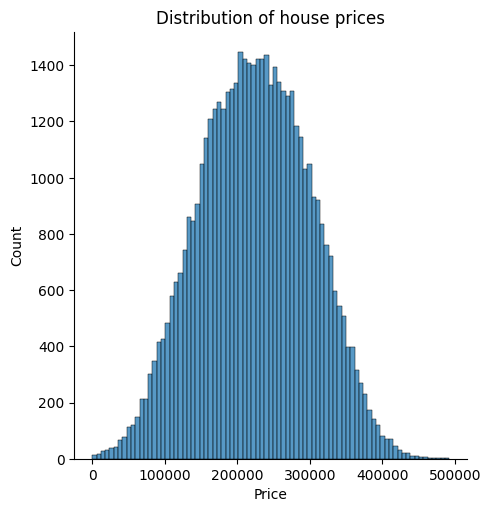

In [9]:
# check the distribution of the Price of houses 
plt.figure(figsize=(9, 9))
sns.displot(hp_df.Price)
plt.title('Distribution of house prices')

The Prices of house now have a normal distribution, after taking the absolute value of the column.

C:\Users\DAVID\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


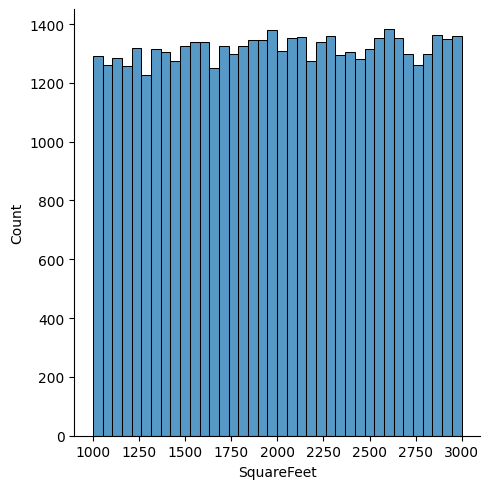

In [10]:
sns.displot(hp_df['SquareFeet'])

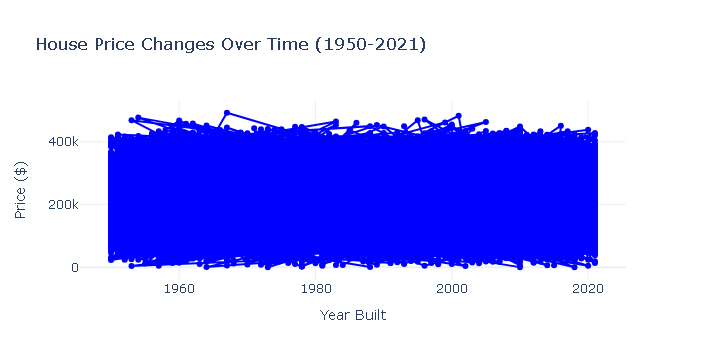

In [11]:
# Create the line plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=hp_df['YearBuilt'],
    y=hp_df['Price'],
    mode='lines+markers',
    name='House Price',
    line=dict(color='blue', width=2),
    marker=dict(size=6, color='blue')
))

# Add title and labels
fig.update_layout(
    title='House Price Changes Over Time (1950-2021)',
    xaxis_title='Year Built',
    yaxis=dict(title='Price ($)'),
    template='plotly_white'
)

Text(0.5, 1.0, 'Distribution of Neighborhoods')

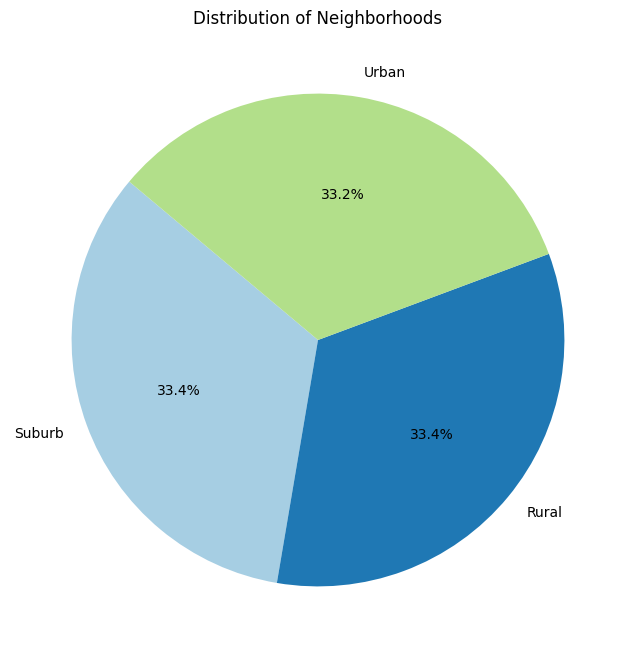

In [12]:
neighborhood_counts = hp_df['Neighborhood'].value_counts()
# create a pie chart 
plt.figure(figsize=(8, 8))
plt.pie(neighborhood_counts, labels=neighborhood_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(neighborhood_counts))))
# Add title
plt.title('Distribution of Neighborhoods')      

All categories cover about the same proportion.

Text(0.5, 1.0, 'Correlation Between Features')

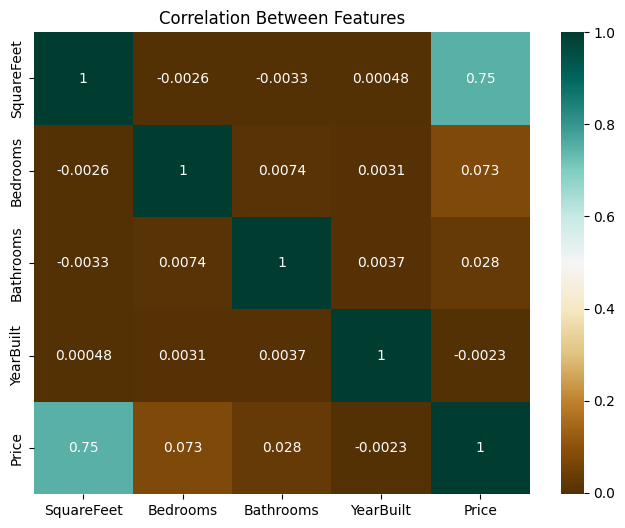

In [13]:
# relationship between features
correlation = hp_df[['SquareFeet','Bedrooms', 'Bathrooms','YearBuilt',
             'Price']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='BrBG')
plt.title('Correlation Between Features')

There is a strong correlation between the size of the house (SquareFeet) and the Price. The value 0.75 means that as  price of the house increases as the size increases.

**Create a scatter plot that explores the relationship between the sqaure feet and price, with a hue indicating whether the neighborhood is rural or urban.**

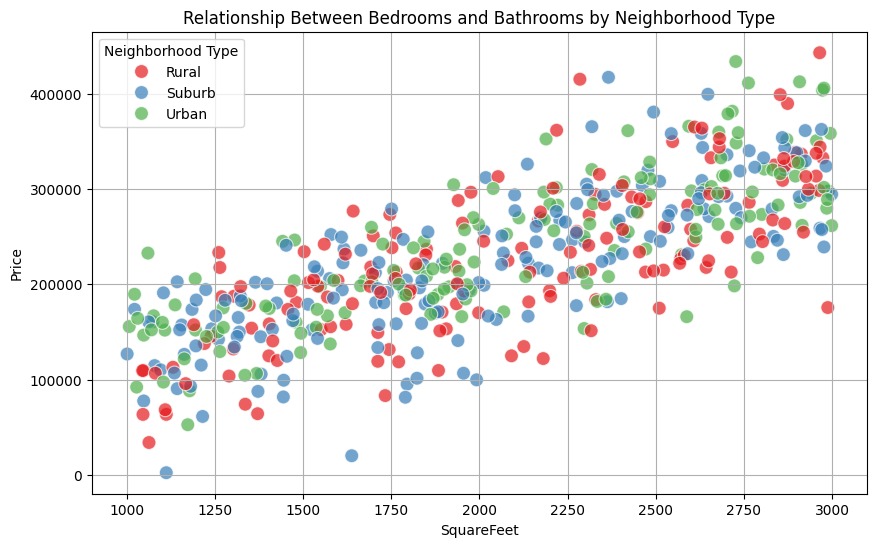

In [14]:
# take 500 samples from our data 
sampled_df = hp_df.sample(n=500, random_state=42)
# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='SquareFeet',
    y='Price',
    hue='Neighborhood',
    data=sampled_df,
    palette='Set1', 
    s=100,           
    edgecolor='w',   
    alpha=0.7        
)

# Add labels and title
plt.title('Relationship Between Bedrooms and Bathrooms by Neighborhood Type')
plt.xlabel('SquareFeet')
plt.ylabel('Price')

# Display the plot
plt.legend(title='Neighborhood Type')
plt.grid(True)
plt.show()

There is a positive correlation between house prices and their sizes in square feet, meaning that larger houses tend to be more expensive. However, many data points are scattered widely around the regression line, indicating that the relationship is not perfectly linear and there is significant variability in how price and size are related.

# DATA PREPROCESSING AND MODELLING 

In [15]:
# encode categorical data 
list(hp_df['Neighborhood'].unique())

['Rural', 'Suburb', 'Urban']

In [16]:
# label encoder
le = LabelEncoder()
# update the existing columns to the transformed form
hp_df['Neighborhood'] = pd.DataFrame(le.fit_transform(hp_df['Neighborhood']), 
                                            columns=['Neighborhood'])

In [17]:
hp_df.head()

SquareFeet  Bedrooms  Bathrooms  Neighborhood  YearBuilt          Price
0        2126         4          1             0       1969  215355.283618
1        2459         3          2             0       1980  195014.221626
2        1860         2          1             1       1970  306891.012076
3        2294         2          1             2       1996  206786.787153
4        2130         5          2             1       2001  272436.239065

In [18]:
# split the data 
X = hp_df.drop('Price', axis=1)
Y = hp_df['Price']

In [19]:
# training and test set with 80/20 proportion 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=12)

In [20]:
# standardize the training set 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# LINEAR REGRESSION

In [21]:
# initialize the model
lg = LinearRegression()
lg.fit(X_train_scaled, y_train)

LinearRegression()

In [22]:
# predictions
pred = lg.predict(X_test_scaled)

In [23]:
# score
mean_absolute_percentage_error(y_test, pred)

0.23880096183120655

# RIDGE REGRESSION 

In [24]:
from sklearn.model_selection import RandomizedSearchCV

In [25]:
param_grid = {
    'alpha': np.logspace(-4, 4, 100)
}

# ridge model
ridge = Ridge()
random_search = RandomizedSearchCV(
    ridge,
    param_distributions=param_grid,
    n_iter=100,
    cv=5,
    scoring='neg_mean_absolute_error',
    random_state=42
)

random_search.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=5, estimator=Ridge(), n_iter=100,
                   param_distributions={'alpha': array([1.00000000e-04, 1.20450354e-04, 1.45082878e-04, 1.74752840e-04,
       2.10490414e-04, 2.53536449e-04, 3.05385551e-04, 3.67837977e-04,
       4.43062146e-04, 5.33669923e-04, 6.42807312e-04, 7.74263683e-04,
       9.32603347e-04, 1.12332403e-03, 1.35304777e-03, 1.62975083e-03,
       1.96304065e-03, 2.3644...
       2.91505306e+02, 3.51119173e+02, 4.22924287e+02, 5.09413801e+02,
       6.13590727e+02, 7.39072203e+02, 8.90215085e+02, 1.07226722e+03,
       1.29154967e+03, 1.55567614e+03, 1.87381742e+03, 2.25701972e+03,
       2.71858824e+03, 3.27454916e+03, 3.94420606e+03, 4.75081016e+03,
       5.72236766e+03, 6.89261210e+03, 8.30217568e+03, 1.00000000e+04])},
                   random_state=42, scoring='neg_mean_absolute_error')

In [26]:
print('Best parameter found:', random_search.best_params_)

Best parameter found: {'alpha': 0.0001}


In [27]:
# best estimator
best_model = random_search.best_estimator_

In [28]:
# predictions
preds = best_model.predict(X_test_scaled)

In [29]:
# score
mean_absolute_percentage_error(y_test, preds)

0.23880096196478198

In [30]:
# mse 
mse = mean_squared_error(y_test, preds)
mse

2450199795.9792595

In [31]:
# RMSE
rmse = np.sqrt(mse)
print('RMSE :', rmse)

RMSE : 49499.49288608177


# RANDOM FOREST REGRESSION


In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
rfg = RandomForestRegressor()
rfg.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [34]:
# predict 
y_pred = rfg.predict(X_test_scaled)

In [35]:
# score
mean_absolute_percentage_error(y_test, y_pred)

0.25200508705501945

# XGBOOST REGRESSOR

In [36]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [37]:
# prediction 
predictions = xgb.predict(X_test_scaled)

In [38]:
# score
mean_absolute_percentage_error(y_test, predictions)

0.24014776444009636

In [39]:
# r2_score
score = r2_score(y_test, predictions)
print(score)

0.5674775129155889


Mean Absolute Percentage Error (MAPE) is a commonly used metric that quantifies the average percentage difference between predicted and actual values. In this analysis, both linear regression and ridge regression (with hyperparameters optimized through randomized search) yielded the most accurate results. On average, the predicted values deviated by 23.8% from the actual values, indicating the extent of prediction error.